In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import gstools as gs # Need to pip install
import meshio       # Need to pip install
from icosphere import icosphere
seed = gs.random.MasterRNG(20170525)
from scipy.stats._stats_py import _chk2_asarray # This was so netneurotools would work. May not be necessary

from netneurotools import stats as statsNNT # Need to pip install
import helpers
import scipy, math
from sklearn.metrics import DistanceMetric
from scipy import special

sphere_coords=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords.txt')*100
num_rotations=100 # Generate random spins on the sphere.
spins=statsNNT.gen_spinsamples(sphere_coords,np.zeros(sphere_coords.shape[0]),n_rotate=num_rotations)#,exact=True,method='hungarian')
#spins=statsNNT.gen_spinsamples(sphere_coords,np.zeros(sphere_coords.shape[0]),n_rotate=num_rotations)

iterations=5000 # number of data sets to generate

bins=20 # number of bins for the variogram/cross-variogram calculation

#Variables to store results
PermResults=[]
MeasCorrResults=[]


# for k in range(iterations):

#     fileName='/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/NS_Maps_'+ str(k+1) + '.txt'
#     samples=np.loadtxt(fileName)
#     MeasureCorr=stats.spearmanr(samples[:,0],samples[:,1])[0] # Calculate the "true" correlation between the two maps 

    
#     # Do spin tests comparing true corr with randomised corr
    
#     ShuffCor=np.zeros(spins.shape[1]) 

    
#     for j in range(spins.shape[1]):     #Each iteration we will rotate the high and low SA1 data and then merge them at based on position (x>0 and x<0)
#         Shuffpoints_dataMixed=samples[:,0][spins[:,j]]
#         ShuffCor[j]=stats.spearmanr(Shuffpoints_dataMixed,samples[:,1])[0] # Calculate the correlation for the rotated data with the unrotated second map

#     MeasCorrResults.append(MeasureCorr)
#     PermResults.append(np.sum(MeasureCorr>ShuffCor)) # calculate the number of true with a greater corr than shuffled

# plt.hist(MeasCorrResults,bins=np.linspace(-0.8,0.8,30))

# plt.pause(0.01)
# plt.hist(PermResults,bins=bins);





In [ ]:
spins.shape

In [ ]:
iterations=5000 # number of data sets to generate
PermResults=[]
MeasCorrResults=[]

for k in range(iterations):
    print(k)
    fileName='/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/NS_Maps_'+ str(k+1) + '.txt'
    samples=np.loadtxt(fileName)
    MeasureCorr=stats.spearmanr(samples[:,0],samples[:,1])[0] # Calculate the "true" correlation between the two maps 

    
    # Do spin tests comparing true corr with randomised corr
    
    ShuffCor=np.zeros(spins.shape[1]) 

    
    for j in range(spins.shape[1]):     #Each iteration we will rotate the high and low SA1 data and then merge them at based on position (x>0 and x<0)
        Shuffpoints_dataMixed=samples[:,0][spins[:,j]]
        ShuffCor[j]=stats.spearmanr(Shuffpoints_dataMixed,samples[:,1])[0] # Calculate the correlation for the rotated data with the unrotated second map

    MeasCorrResults.append(MeasureCorr)
    PermResults.append(np.sum(MeasureCorr>ShuffCor)) # calculate the number of true with a greater corr than shuffled

plt.hist(MeasCorrResults,bins=np.linspace(-0.8,0.8,bins))

plt.pause(0.01)
plt.hist(PermResults,bins=bins);


In [ ]:
plt.rcParams['font.family'] = 'Arial'
plt.hist(MeasCorrResults,bins=np.linspace(-0.8,0.8,30),edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(MeasCorrResults) / len(MeasCorrResults))
#print(np.mean(MeasCorrResults))
ax=plt.gca()
ax.set_ylim(0,0.13)

#plt.hist(np.asarray(PermResults)[:950]/num_rotations,bins=20);
plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullNSCorrVal_Histograms.png',dpi=300)
plt.show()
bins = range(min(PermResults), max(PermResults) + 2)
bins=20


# Plot histogram with outlined columns and small gap
plt.hist(np.asarray(PermResults)/num_rotations, bins=bins, edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(PermResults) / len(PermResults));
ax=plt.gca()
ax.set_ylim(0,0.12)

plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullNS_Histograms.png',dpi=300)
plt.show()


In [ ]:
iterations=5000 # number of data sets to generate
PermResults_S=[]
MeasCorrResults_S=[] #stationary version

for k in range(iterations):
    print(k)
    fileName='/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/S_Maps_'+ str(k+1) + '.txt'
    samples=np.loadtxt(fileName)
    MeasureCorr=stats.spearmanr(samples[:,0],samples[:,1])[0] # Calculate the "true" correlation between the two maps 

    # Do spin tests comparing true corr with randomised corr
    
    ShuffCor=np.zeros(spins.shape[1]) 

    for j in range(spins.shape[1]):     #Each iteration we will rotate the high and low SA1 data and then merge them at based on position (x>0 and x<0)
        Shuffpoints_dataMixed=samples[:,0][spins[:,j]]
        ShuffCor[j]=stats.spearmanr(Shuffpoints_dataMixed,samples[:,1])[0] # Calculate the correlation for the rotated data with the unrotated second map

    MeasCorrResults_S.append(MeasureCorr)
    PermResults_S.append(np.sum(MeasureCorr>ShuffCor)) # calculate the number of true with a greater corr than shuffled

plt.hist(MeasCorrResults_S,bins=np.linspace(-0.8,0.8,bins))

plt.pause(0.01)
plt.hist(PermResults_S,bins=bins);


In [ ]:
plt.rcParams['font.family'] = 'Arial'
plt.hist(MeasCorrResults_S,bins=np.linspace(-0.8,0.8,30),edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(MeasCorrResults_S) / len(MeasCorrResults_S))
#print(np.mean(MeasCorrResults))
ax=plt.gca()
ax.set_ylim(0,0.13)

#plt.hist(np.asarray(PermResults)[:950]/num_rotations,bins=20);
plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullSCorrVal_Histograms.png',dpi=300)
plt.show()
bins = range(min(PermResults), max(PermResults) + 2)
bins=20


# Plot histogram with outlined columns and small gap
plt.hist(np.asarray(PermResults_S)/num_rotations, bins=bins, edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(PermResults_S) / len(PermResults_S));

ax=plt.gca()
ax.set_ylim(0,0.12)

plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullS_Histograms.png',dpi=300)
plt.show()

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import gstools as gs # Need to pip install
import meshio       # Need to pip install
from icosphere import icosphere
seed = gs.random.MasterRNG(20170525)
from scipy.stats._stats_py import _chk2_asarray # This was so netneurotools would work. May not be necessary

from netneurotools import stats as statsNNT # Need to pip install
import helpers
import scipy, math
from sklearn.metrics import DistanceMetric
from scipy import special
import matplotlib

# Helper functions

def write_plyRGB(filename, vertices, faces, colorsR,colorsG,colorsB,comment=None):
    import pandas as pd
    print("writing ply format")
    # infer number of vertices and faces
    number_vertices = vertices.shape[0]
    number_faces = faces.shape[0]
    # make header dataframe
    header = ['ply',
            'format ascii 1.0',
            'comment %s' % comment,
            'element vertex %i' % number_vertices,
            'property float x',
            'property float y',
            'property float z',
            'property uchar red',
            'property uchar green',
            'property uchar blue',
            'element face %i' % number_faces,
            'property list uchar int vertex_indices',
            'end_header'
             ]
    header_df = pd.DataFrame(header)
    # make dataframe from vertices
    vertex_df = pd.DataFrame(vertices/50)
    #colors_df = pd.DataFrame(np.tile(np.round(colors/7*255), (3,1)).T)
    ColorsR_df=pd.DataFrame(colorsR)
    ColorsG_df=pd.DataFrame(colorsG)
    ColorsB_df=pd.DataFrame(colorsB)
    colorsConcat = pd.concat([ColorsR_df,ColorsG_df,ColorsB_df], axis=1)
    colors_df=pd.DataFrame(colorsConcat)
    colors_df=colorsConcat.astype(int)
    df_concat = pd.concat([vertex_df, colors_df], axis=1)
    # make dataframe from faces, adding first row of 3s (indicating triangles)
    triangles = np.reshape(3 * (np.ones(number_faces)), (number_faces, 1))
    triangles = triangles.astype(int)
    faces = faces.astype(int)
    faces_df = pd.DataFrame(np.concatenate((triangles, faces), axis=1))
    # write dfs to csv
    header_df.to_csv(filename, header=None, index=False)
    with open(filename, 'a') as f:
        df_concat.to_csv(f, header=False, index=False,
                         float_format='%.3f', sep=' ')
    with open(filename, 'a') as f:
        faces_df.to_csv(f, header=False, index=False,
                        float_format='%.0f', sep=' ')




In [114]:
sphere_coords=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords_lowres.txt')*100
Sphere_tris=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereTris_lowres.txt')-1
NS_Sample=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/NS_V3_Maps_145.txt')
S_Sample=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/S_Maps_120.txt')

cmap = matplotlib.cm.get_cmap('bwr')


nameToDisplay='NonStationarySphere'

colors=NS_Sample[:,0]
#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255
write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + 'LowRes.ply',sphere_coords,Sphere_tris,CMap[:,0],CMap[:,1],CMap[:,2])
colors=NS_Sample[:,1]
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255

write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + '2LowRes.ply',sphere_coords,Sphere_tris,CMap[:,0],CMap[:,1],CMap[:,2])


#colors=S_Sample[:,0]
#nameToDisplay='StationarySphere'

#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
#norm = matplotlib.colors.Normalize()#vmin=DataRange[0], vmax=DataRange[1])
#CMap=cmap(norm(colors))*255
#write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + 'LowRes.ply',sphere_coords,Sphere_tris,CMap[:,0],CMap[:,1],CMap[:,2])


writing ply format
writing ply format


In [ ]:
colors=NS_Sample[:,0]
nameToDisplay='NonStationarySphere'

DataRange=np.array([np.percentile(colors,10),np.percentile(colors,90)])
norm = matplotlib.colors.Normalize()#(vmin=DataRange[0], vmax=DataRange[1])
CMap=cmap(norm(colors))*255

plt.plot(CMap[:,2])



In [ ]:
#plt.hist(CMap[:,2])
DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
DataRange


In [ ]:
# logkappa *2 binary variable -0.5 nu 2

sphere_coords_v2=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords_lowres.txt')*100
num_rotations=500 # Generate random spins on the sphere.

spins_v2=statsNNT.gen_spinsamples(sphere_coords_v2,np.zeros(sphere_coords_v2.shape[0]),n_rotate=num_rotations)


iterations=5000 # number of data sets to generate
PermResults_v4=[]
MeasCorrResults_v4=[]

for k in range(iterations):
    print(k)
    fileName='/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/NS_V4_Maps_'+ str(k+1) + '.txt'
    samples=np.loadtxt(fileName)
    MeasureCorr=stats.spearmanr(samples[:,0],samples[:,1])[0] # Calculate the "true" correlation between the two maps 

    
    # Do spin tests comparing true corr with randomised corr
    
    ShuffCor=np.zeros(spins.shape[1]) 

    
    for j in range(spins.shape[1]):     #Each iteration we will rotate the high and low SA1 data and then merge them at based on position (x>0 and x<0)
        Shuffpoints_dataMixed=samples[:,0][spins[:,j]]
        ShuffCor[j]=stats.spearmanr(Shuffpoints_dataMixed,samples[:,1])[0] # Calculate the correlation for the rotated data with the unrotated second map

    MeasCorrResults_v4.append(MeasureCorr)
    PermResults_v4.append(np.sum(MeasureCorr>ShuffCor)) # calculate the number of true with a greater corr than shuffled

plt.hist(MeasCorrResults_v4,bins=np.linspace(-0.8,0.8,bins))

plt.pause(0.01)
plt.hist(PermResults_v4,bins=bins);



In [ ]:
# logkappa *1 binary variable -0.5 nu 2

sphere_coords_v2=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords_lowres.txt')*100
num_rotations=500 # Generate random spins on the sphere.

spins_v2=statsNNT.gen_spinsamples(sphere_coords_v2,np.zeros(sphere_coords_v2.shape[0]),n_rotate=num_rotations)


iterations=5000 # number of data sets to generate
PermResults_v4=[]
MeasCorrResults_v4=[]

for k in range(iterations):
    print(k)
    fileName='/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/NS_V4_Maps_'+ str(k+1) + '.txt'
    samples=np.loadtxt(fileName)
    MeasureCorr=stats.spearmanr(samples[:,0],samples[:,1])[0] # Calculate the "true" correlation between the two maps 

    # Do spin tests comparing true corr with randomised corr
    
    ShuffCor=np.zeros(spins.shape[1]) 
    
    for j in range(spins.shape[1]):     #Each iteration we will rotate the high and low SA1 data and then merge them at based on position (x>0 and x<0)
        Shuffpoints_dataMixed=samples[:,0][spins[:,j]]
        ShuffCor[j]=stats.spearmanr(Shuffpoints_dataMixed,samples[:,1])[0] # Calculate the correlation for the rotated data with the unrotated second map

    MeasCorrResults_v4.append(MeasureCorr)
    PermResults_v4.append(np.sum(MeasureCorr>ShuffCor)) # calculate the number of true with a greater corr than shuffled

plt.hist(MeasCorrResults_v4,bins=np.linspace(-0.8,0.8,bins))

plt.pause(0.01)
plt.hist(PermResults_v4,bins=bins);


In [ ]:
plt.rcParams['font.family'] = 'Arial'
plt.hist(MeasCorrResults_v4,bins=np.linspace(-0.8,0.8,30),edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(MeasCorrResults_v3) / len(MeasCorrResults_v3))

plt.pause(0.01)

plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullNSCorrVal_lowres_V4_Histograms.png',dpi=300)
bins = range(min(PermResults_v4), max(PermResults_v4) + 2)
bins=20


# Plot histogram with outlined columns and small gap
plt.hist(np.asarray(PermResults_v4)/num_rotations, bins=20, edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(PermResults_v3) / len(PermResults_v3));
plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullNS_lowres_V4_Histograms.png',dpi=300)

In [ ]:
# kappa *2 binary variable -0.5 nu 2

sphere_coords_v2=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords_lowres.txt')*100
num_rotations=500 # Generate random spins on the sphere.

spins_v2=statsNNT.gen_spinsamples(sphere_coords_v2,np.zeros(sphere_coords_v2.shape[0]),n_rotate=num_rotations)


iterations=5000 # number of data sets to generate
PermResults_v3=[]
MeasCorrResults_v3=[]

for k in range(iterations):
    print(k)
    fileName='/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/NS_V3_Maps_'+ str(k+1) + '.txt'
    samples=np.loadtxt(fileName)
    MeasureCorr=stats.spearmanr(samples[:,0],samples[:,1])[0] # Calculate the "true" correlation between the two maps 

    
    # Do spin tests comparing true corr with randomised corr
    
    ShuffCor=np.zeros(spins.shape[1]) 

    
    for j in range(spins.shape[1]):     #Each iteration we will rotate the high and low SA1 data and then merge them at based on position (x>0 and x<0)
        Shuffpoints_dataMixed=samples[:,0][spins[:,j]]
        ShuffCor[j]=stats.spearmanr(Shuffpoints_dataMixed,samples[:,1])[0] # Calculate the correlation for the rotated data with the unrotated second map

    MeasCorrResults_v3.append(MeasureCorr)
    PermResults_v3.append(np.sum(MeasureCorr>ShuffCor)) # calculate the number of true with a greater corr than shuffled

plt.hist(MeasCorrResults_v3,bins=np.linspace(-0.8,0.8,bins))

plt.pause(0.01)
plt.hist(PermResults_v3,bins=bins);



In [ ]:
plt.rcParams['font.family'] = 'Arial'
plt.hist(MeasCorrResults_v3,bins=np.linspace(-0.8,0.8,30),edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(MeasCorrResults_v3) / len(MeasCorrResults_v3))
#print(np.mean(MeasCorrResults))
plt.pause(0.01)
#plt.hist(np.asarray(PermResults)[:950]/num_rotations,bins=20);
plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullNSCorrVal_lowres_V3_Histograms.png',dpi=300)
bins = range(min(PermResults_v3), max(PermResults_v3) + 2)
bins=20


# Plot histogram with outlined columns and small gap
plt.hist(np.asarray(PermResults_v3)/num_rotations, bins=20, edgecolor='black', histtype='bar', rwidth=0.95,weights=np.ones_like(PermResults_v3) / len(PermResults_v3));
plt.savefig('/Users/robleech/Dropbox/BrainSmash/FlatMaps/NullNS_lowres_V3_Histograms.png',dpi=300)

In [219]:
##### Creating images for ground truth R-INLA model 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
groundTruthMesh=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords_FineMesh.txt')*10 
groundTruthMeshTris=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereTrisFineMesh.txt')-1 
TrainMesh=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereCoords_GroundTruthEval.txt')*10 
TrainMeshTris=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/SphereTris_GroundTruthEval.txt')-1# 
groundTruthEvaluate=pd.read_table('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/GroundTruth_evaluate.txt',delimiter=' ')# 
groundTruthTrain=pd.read_table('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/GroundTruth_train.txt',delimiter=' ')# 
pred3=pd.read_table('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/GroundTruthPredCorrect.txt',delimiter=' ')# 


EvalCoords=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/GroundTruth_EvaluateCoords.txt')
TrainCoords=np.loadtxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/InlaGeneratedNS/GroundTruth_trainCoords.txt')
pred=pred3.to_numpy()


Sig1=groundTruthEvaluate['observed'].to_numpy()
Sig2=groundTruthEvaluate['observedAlt'].to_numpy()
Sig1Train=groundTruthTrain['observed'].to_numpy()
Sig2Train=groundTruthTrain['observedAlt'].to_numpy()


np.savetxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/predEvaluate.txt',pred)
np.savetxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/Sig1Train.txt',Sig1Train)
np.savetxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/Sig2Train.txt',Sig2Train)
np.savetxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/Sig1.txt',Sig1)
np.savetxt('/Users/robleech/Dropbox/BrainSmash/FlatMaps/Sig2.txt',Sig2)

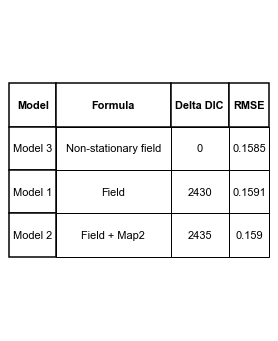

In [229]:
Models=np.array(['Model 1','Model 2','Model 3'])

ModelNames=np.array(['Field','Field + Map2','Non-stationary field'])

DIC=[2430, 2435, 0]

RMSE=[0.1590755,0.1590169,0.1585038]

d = {'Model': Models, 'Formula': ModelNames, 'Delta DIC': DIC,'RMSE': RMSE }

df = pd.DataFrame(data=d)

dfSort=df.sort_values(by=['Delta DIC'])





import matplotlib.pyplot as plt

# Set font to Arial 11
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 15

# Assuming df is your DataFrame
# Set number of decimal points to 3
df_formatted = dfSort.round(4)

fig, ax = plt.subplots(figsize=(5, 5))

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Create the table with formatted DataFrame
table = ax.table(cellText=df_formatted.values, colLabels=df_formatted.columns, loc='center', cellLoc='center')

# Make header and first column bold
for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(fontweight='bold')

# Adjust the width of the cells
table.auto_set_column_width(col=list(range(len(df.columns))))

# Increase line thickness for the first row and first column
for i in range(len(df.index) + 1):
    if (i, 0) in table._cells:
        table[(i, 0)].set_linewidth(1.5)  # Increase line thickness for the first column

for j in range(len(df.columns) + 1):
    if (0, j) in table._cells:
        table[(0, j)].set_linewidth(1.5)  # Increase line thickness for the first row

# Set row heights
for i in range(len(df.index)):
    cell = table[(i+1, 0)]
    cell._text.set_fontsize(11)  # Adjust font size to adjust row height

    
table.scale(1, 3)
fig.tight_layout()

# Save the image with appropriate resolution
plt.savefig('GroundTruthTable.png', dpi=300)  # Change the file format as needed

plt.show()


In [205]:


pred=pred3['median']
pred.shape


(5000,)

In [190]:
eval_coords=groundTruthEvaluate['geometry']

np.array(eval_coords.values)
eval_coords




(5000, 3)

In [141]:

cmap = matplotlib.cm.get_cmap('bwr')


nameToDisplay='GroundTruthMesh'
colors=np.ones(groundTruthMesh.shape[0])
#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255
write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + '.ply',groundTruthMesh,np.int32(groundTruthMeshTris),CMap[:,0],CMap[:,1],CMap[:,2])

nameToDisplay='GroundTruthTrain'
colors=np.ones(TrainMesh.shape[0])
#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255
write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + '.ply',TrainMesh,np.int32(TrainMeshTris),CMap[:,0],CMap[:,1],CMap[:,2])



nameToDisplay='GroundTruthEvaluateSig1'
colors=Sig1
#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255
write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + '.ply',TrainMesh,np.int32(TrainMeshTris),CMap[:,0],CMap[:,1],CMap[:,2])


nameToDisplay='GroundTruthEvaluateSig2'
colors=Sig2
#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255
write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + '.ply',TrainMesh,np.int32(TrainMeshTris),CMap[:,0],CMap[:,1],CMap[:,2])


nameToDisplay='GroundTruthEvaluatePred'
colors=pred
#DataRange=np.array([np.percentile(colors,0),np.percentile(colors,100)])
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
CMap=cmap(norm(colors))*255
write_plyRGB('/Users/robleech/Dropbox/BrainSmash/FlatMaps/'+nameToDisplay + '.ply',TrainMesh,np.int32(TrainMeshTris),CMap[:,0],CMap[:,1],CMap[:,2])




writing ply format
writing ply format
writing ply format
writing ply format
writing ply format


1     0.513104946599602,   -0.0435576513700183,   -0.702407
2     0.690437780903321,   -0.353881192633072,    -0.425896
3     -0.758839320299327,  -0.293716290513694,     0.695983
4     -0.621652031504247,  0.778701633448753,      0.494671
5     -0.837225704196483,  0.163930324376675,     -0.196900
                                                     ...   
4996  0.110978739883935,   0.768906577356721,     -0.110919
4997  -0.489037987651489,  -0.785620203994471,    -0.378462
4998  -0.199684178566379,  0.978566297495011,      0.505465
4999  -0.556944952681305,  0.0430872568231035,     0.135212
5000  0.0111234090957625,  -0.642500200606291,    -1.734635
Name: observed, Length: 5000, dtype: float64

In [2]:
##### Creating table from dic and rmse for t1w/t2w versus FC1 R-INLA comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dic=pd.read_table('/Users/robleech/Dropbox/BrainSmash/FlatMaps/dic.txt',delimiter=' ')# /Users/robleech/Dropbox/BrainSmash/FlatMaps/rmse.txt)
rmse=pd.read_table('/Users/robleech/Dropbox/BrainSmash/FlatMaps/rmse.txt',delimiter=' ')# /Users/robleech/Dropbox/BrainSmash/FlatMaps/rmse.txt)


In [3]:
print(dic.to_numpy()[:,1:].mean(axis=0))

print(dic.to_numpy()[:,1:].std(axis=0))


data = dic.to_numpy()[:,1:]

# Extract the first column
first_column = data[:, 1]

# Subtract each subsequent column from the first column
result = data[:, 1:] - first_column[:, np.newaxis] 

#plt.colorbar()
result

dic

[ 1438.95901493  2439.23877286  2508.92744387 38981.19304488
  2438.54329432  2774.8791393   2776.31231662  2510.52179644]
[507.57650092 578.98310838 592.48860101  60.82270252 581.85196618
 527.02105155 526.86025033 590.54993761]


,Index,fit1dic,fit2dic,fit3dic,fit4dic,fit5dic,fit7dic,fit8dic,fit9dic
0,1,1402.768441,2438.230313,2469.834814,38902.428537,2441.011281,2620.377633,2621.784836,2486.651606
1,2,1934.599062,3418.450586,3451.124618,39006.239441,3425.748214,3564.341943,3561.028336,3466.852663
2,3,846.650711,1687.020926,1721.370286,39036.782426,1688.195309,2040.631660,2040.725464,1717.208075
3,4,1956.690762,2902.285776,2950.432893,39026.381356,2900.490882,3176.911218,3182.240235,2942.091760
4,5,594.646213,1525.582218,1576.529712,39018.275550,1516.151574,1900.125201,1901.532971,1575.803225
5,6,2222.247743,3115.551022,3225.736562,38925.089171,3116.512915,3488.370741,3489.028123,3212.676768
6,7,1798.589506,2455.432188,2478.654766,38875.103471,2452.425911,2895.117519,2895.460096,2484.414182
7,8,968.197904,1876.966579,1905.854542,38940.261301,1873.487562,2407.526144,2407.159439,1929.641591
8,9,1405.108407,2492.750471,2566.553997,39056.480595,2494.113002,2841.682757,2846.233245,2556.072141
9,10,1260.091400,2480.117650,2743.182250,39024.888601,2477.296293,2813.706577,2817.930424,2733.805954


69.72800000000001

In [7]:


ModelNames=np.array(['SVC + Field','T1w/T2w + Field','Field','T1w/T2w + Intercept','T1w/T2w + NSField','T1w/T2w + Intercept + SVC','Intercept + SVC','NSField'])
        
dic_mean=dic.to_numpy()[:,1:].mean(axis=0)
temp=dic_mean.argsort()
dic_ranks = np.empty_like(temp)
dic_ranks[temp] = np.arange(len(dic_mean))+1


#np.mean(dic.to_numpy()[:,1:],axis=0)
rmse_mean=rmse.to_numpy()[:,1:].mean(axis=0)


rmse_sd=rmse.to_numpy()[:,1:].std(axis=0)

d = {'Model': ModelNames, 'DIC Rank': dic_ranks, 'Mean RMSE': rmse_mean,'Std RMSE': rmse_sd}

df = pd.DataFrame(data=d)

dfSort=df.sort_values(by=['DIC Rank'])

In [8]:
dfSort

,Model,DIC Rank,Mean RMSE,Std RMSE
0,SVC + Field,1,0.296306,0.009790
4,T1w/T2w + NSField,2,0.316138,0.014162
1,T1w/T2w + Field,3,0.315965,0.014376
2,Field,4,0.316725,0.013537
7,NSField,5,0.316962,0.013641
5,T1w/T2w + Intercept + SVC,6,1.190086,0.754378
6,Intercept + SVC,7,1.139996,0.728023
3,T1w/T2w + Intercept,8,21.705040,0.324313


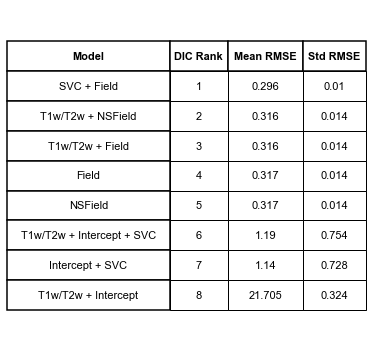

In [9]:
import matplotlib.pyplot as plt

# Set font to Arial 11
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 15

# Assuming df is your DataFrame
# Set number of decimal points to 3
df_formatted = dfSort.round(3)

fig, ax = plt.subplots(figsize=(5, 5))

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Create the table with formatted DataFrame
table = ax.table(cellText=df_formatted.values, colLabels=df_formatted.columns, loc='center', cellLoc='center')

# Make header and first column bold
for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(fontweight='bold')

# Adjust the width of the cells
table.auto_set_column_width(col=list(range(len(df.columns))))

# Increase line thickness for the first row and first column
for i in range(len(df.index) + 1):
    if (i, 0) in table._cells:
        table[(i, 0)].set_linewidth(1.5)  # Increase line thickness for the first column

for j in range(len(df.columns) + 1):
    if (0, j) in table._cells:
        table[(0, j)].set_linewidth(1.5)  # Increase line thickness for the first row

# Set row heights
for i in range(len(df.index)):
    cell = table[(i+1, 0)]
    cell._text.set_fontsize(11)  # Adjust font size to adjust row height

    
table.scale(1, 2)
fig.tight_layout()

# Save the image with appropriate resolution
plt.savefig('RMSEDicTable.png', dpi=300)  # Change the file format as needed

plt.show()
